Data Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
num_words = 10000    # Only consider the top 10,000 words
maxlen = 150         # Cut off reviews after 150 words

# Load the IMDB dataset; note that Keras already uses an integer encoding for words.
(x_train_full, y_train_full), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad all sequences to 'maxlen'
x_train_full = pad_sequences(x_train_full, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# For our initial experiment, use only the first 100 training samples.
x_train = x_train_full[:100]
y_train = y_train_full[:100]

# Use the first 10,000 examples from the test set for validation.
x_val = x_test[:10000]
y_val = y_test[:10000]

print("Train shape:", x_train.shape)
print("Validation shape:", x_val.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (100, 150)
Validation shape: (10000, 150)


Model A – Trainable Embedding Layer

In [2]:
model_a = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_a.summary()

history_a = model_a.fit(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(x_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4269 - loss: 0.6938 - val_accuracy: 0.5047 - val_loss: 0.6927
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5796 - loss: 0.6805 - val_accuracy: 0.5047 - val_loss: 0.6924
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6117 - loss: 0.6643 - val_accuracy: 0.5032 - val_loss: 0.6927
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6055 - loss: 0.6473 - val_accuracy: 0.5028 - val_loss: 0.6946
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6273 - loss: 0.6137 - val_accuracy: 0.5027 - val_loss: 0.7032
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6098 - loss: 0.5651 - val_accuracy: 0.5028 - val_loss: 0.7230
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6614 - loss: 0.5174 - val_accuracy: 0.5053 - val_loss: 0.7086
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8577 - loss: 0.4343 - val_accuracy: 0.5239 - val_loss: 0.6981
Epoch 9/10


Model B – Pretrained GloVe Embedding

In [3]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip


--2025-04-17 22:27:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-17 22:27:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-17 22:27:59--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [4]:
# Load pretrained GloVe embeddings (100d)
embedding_dim = 100
embeddings_index = {}
glove_file = "glove.6B.100d.txt"
with open(glove_file, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print(f"Found {len(embeddings_index)} word vectors.")

# Get the word index from the IMDB dataset.
word_index = imdb.get_word_index()

# Prepare the embedding matrix. Note: Keras reserves some indices (e.g., 0 for padding).
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define Model B with the pretrained, non-trainable embedding.
model_b = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words,
                              output_dim=embedding_dim,
                              input_length=maxlen,
                              weights=[embedding_matrix],
                              trainable=False),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_b.summary()

history_b = model_b.fit(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(x_val, y_val))


Found 400000 word vectors.
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6049 - loss: 0.6845 - val_accuracy: 0.5029 - val_loss: 0.7172
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5945 - loss: 0.6646 - val_accuracy: 0.4949 - val_loss: 0.7038
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6135 - loss: 0.6659 - val_accuracy: 0.4864 - val_loss: 0.6978
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6482 - loss: 0.6680 - val_accuracy: 0.4883 - val_loss: 0.6978
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7245 - loss: 0.6584 - val_accuracy: 0.4877 - val_loss: 0.6995
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6796 - loss: 0.6464 - val_accuracy: 0.5004 - val_loss: 0.7068
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6880 - loss: 0.6344 - val_accuracy: 0.4985 - val_loss: 0.7053
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6989 - loss: 0.6272 - val_accuracy: 0.4981 - val_loss: 0.7059
Epoch 9/10
4

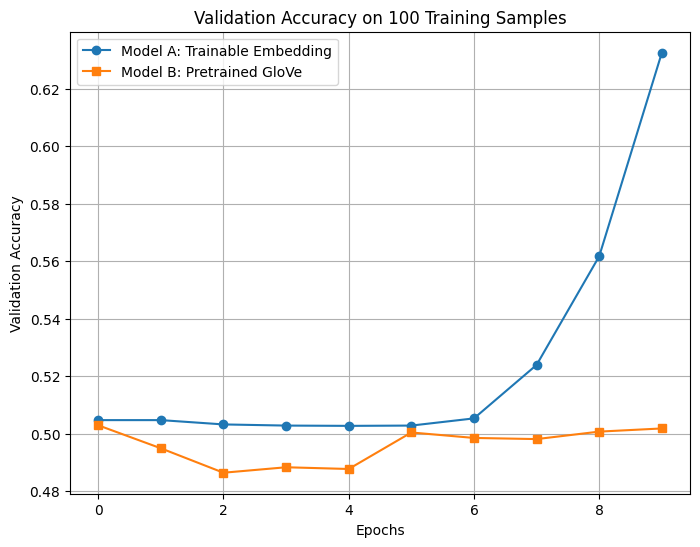

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(history_a.history['val_accuracy'], label='Model A: Trainable Embedding', marker='o')
plt.plot(history_b.history['val_accuracy'], label='Model B: Pretrained GloVe', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy on 100 Training Samples')
plt.legend()
plt.grid(True)
plt.show()


Experimenting with Varying Training Sizes



Training with 50 samples
Trainable Embedding Val Acc: 0.5028, Pretrained GloVe Val Acc: 0.5064

Training with 100 samples
Trainable Embedding Val Acc: 0.6412, Pretrained GloVe Val Acc: 0.5042

Training with 200 samples
Trainable Embedding Val Acc: 0.6494, Pretrained GloVe Val Acc: 0.5156

Training with 500 samples
Trainable Embedding Val Acc: 0.7162, Pretrained GloVe Val Acc: 0.5411

Training with 1000 samples
Trainable Embedding Val Acc: 0.7622, Pretrained GloVe Val Acc: 0.5526


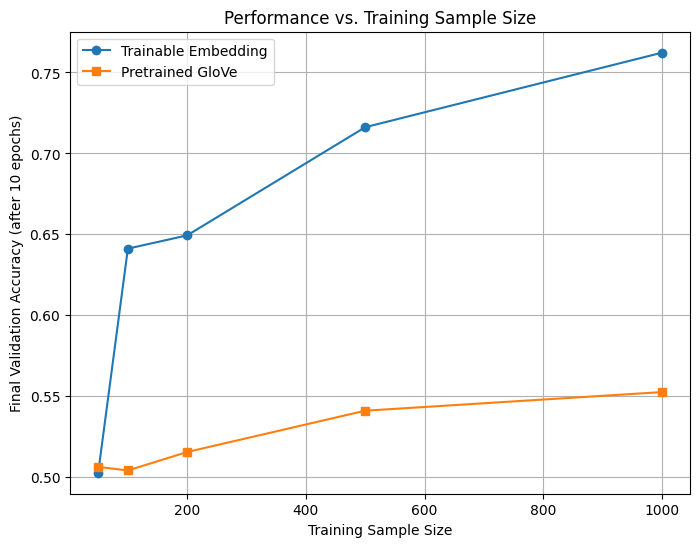

In [6]:
# We reload the full training set (pre-padded) to sample different sizes.
x_train_full = pad_sequences(x_train_full, maxlen=maxlen)
sizes = [50, 100, 200, 500, 1000]
results = {"Trainable": [], "Pretrained": []}

for size in sizes:
    print(f"\nTraining with {size} samples")

    # Create subsets
    x_train_subset = x_train_full[:size]
    y_train_subset = y_train_full[:size]

    # Model A - Trainable
    model_a = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model_a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history_a = model_a.fit(x_train_subset, y_train_subset,
                            epochs=10,
                            batch_size=32,
                            verbose=0,
                            validation_data=(x_val, y_val))
    final_acc_a = history_a.history['val_accuracy'][-1]
    results["Trainable"].append(final_acc_a)

    # Model B - Pretrained
    model_b = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=num_words,
                                  output_dim=embedding_dim,
                                  input_length=maxlen,
                                  weights=[embedding_matrix],
                                  trainable=False),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history_b = model_b.fit(x_train_subset, y_train_subset,
                            epochs=10,
                            batch_size=32,
                            verbose=0,
                            validation_data=(x_val, y_val))
    final_acc_b = history_b.history['val_accuracy'][-1]
    results["Pretrained"].append(final_acc_b)

    print(f"Trainable Embedding Val Acc: {final_acc_a:.4f}, Pretrained GloVe Val Acc: {final_acc_b:.4f}")

# Plot the comparison
plt.figure(figsize=(8,6))
plt.plot(sizes, results["Trainable"], label="Trainable Embedding", marker='o')
plt.plot(sizes, results["Pretrained"], label="Pretrained GloVe", marker='s')
plt.xlabel("Training Sample Size")
plt.ylabel("Final Validation Accuracy (after 10 epochs)")
plt.title("Performance vs. Training Sample Size")
plt.legend()
plt.grid(True)
plt.show()
